# Occupational Health EDA Notebook

**Author:** Martin Rivero, PhD

**Date:** January 15, 2026

**Description:**
This notebook performs a comprehensive exploratory data analysis (EDA) on synthetic occupational health datasets, following best practices for reproducibility and clarity. The results will inform the next phase of predictive modeling.

# Exploratory Data Analysis (EDA) in Python

Welcome! You have already created synthetic datasets and built a Power BI dashboard. The next logical step is to perform an Exploratory Data Analysis (EDA) in Python to better understand the data structure and relationships before training machine learning models.

## ✅ PHASE 3: Exploratory Data Analysis (EDA)

This notebook follows a clear and reproducible structure, suitable for sharing and versioning on GitHub.

### 🧪 1. Load Libraries and Datasets
- Import essential libraries: `pandas`, `numpy`, `matplotlib`, and `seaborn`.
- Set a consistent visual style for plots.
- Load the following datasets:
  - `employees.csv`: Employee demographic and job information
  - `medical_evaluations.csv`: Health metrics and evaluations
  - `health_events.csv`: Records of health-related events
  - `monthly_kpis.csv`: Monthly key performance indicators

### 🔍 2. General Table Analysis
- **employees.csv**: Analyze gender, age, and seniority distributions; employees by city and department; create age groups.
- **medical_evaluations.csv**: Explore BMI and cholesterol distributions, smoker proportions, and percentage fit for work.
- **health_events.csv**: Examine event causes, events by city or employee, and total absence duration.

### 📈 3. Key Correlations and Relationships
- Investigate relationships between BMI and cholesterol, cholesterol and fitness for work, and compare indicators by gender or age group.

---
**Best Practices:**
- Use clear variable names and comments.
- Visualize distributions and relationships with appropriate plots.
- Document each step for reproducibility.
- Ensure code and outputs are ready for sharing on GitHub.


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [37]:
# Print library versions for reproducibility
import sys
print('Python version:', sys.version)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', plt.matplotlib.__version__)
print('seaborn version:', sns.__version__)


Python version: 3.11.14 (main, Oct 21 2025, 18:31:21) [GCC 11.2.0]
pandas version: 2.3.3
numpy version: 2.3.5
matplotlib version: 3.10.7
seaborn version: 0.13.2


In [2]:
# Load datasets from Windows drive mounted on Ubuntu
employees = pd.read_csv('/mnt/e/Desktop/Data Science 2025/3-occupational health/employees.csv')
health_events = pd.read_csv('/mnt/e/Desktop/Data Science 2025/3-occupational health/health_events.csv')
medical_evaluations = pd.read_csv('/mnt/e/Desktop/Data Science 2025/3-occupational health/medical_evaluations.csv')
monthly_kpis = pd.read_csv('/mnt/e/Desktop/Data Science 2025/3-occupational health/monthly_kpis.csv')

In [3]:
# Display the first rows of each table to verify successful loading
print('Employees table:')
display(employees.head())
print('Health Events table:')
display(health_events.head())
print('Medical Evaluations table:')
display(medical_evaluations.head())
print('Monthly KPIs table:')
display(monthly_kpis.head())

Employees table:


,employee_id,age,gender,department,seniority_years,location
0,1,56,M,Operations,29,Monterrey
1,2,46,F,Operations,21,Medellín
2,3,32,F,Operations,27,Rio de Janeiro
3,4,60,F,Operations,6,Montevideo
4,5,25,M,HR,34,São Paulo


Health Events table:


,event_id,employee_id,cause,duration_days,date,estimated_cost
0,1,247,Illness,13,2025-02-19,3766.35
1,2,72,Accident,22,2025-03-01,655.96
2,3,830,Medical leave,5,2025-02-19,1313.07
3,4,185,Accident,22,2024-01-26,4055.99
4,5,6,Other,7,2025-01-05,3838.67


Medical Evaluations table:


,evaluation_id,employee_id,date,BMI,cholesterol,smoker,fit_for_work
0,1,497,2025-05-03,31.8,268,False,True
1,2,561,2024-08-17,29.5,218,False,True
2,3,484,2025-01-04,28.3,282,False,True
3,4,849,2024-06-26,27.6,294,True,True
4,5,722,2025-02-13,32.6,201,False,True


Monthly KPIs table:


,department,month,absenteeism_%,accidents,active_employees
0,Operations,2024-01,0.22,7,235
1,Operations,2024-02,4.91,0,196
2,Operations,2024-03,9.39,9,114
3,Operations,2024-04,7.74,0,117
4,Operations,2024-05,7.39,6,93


## Missing and Zero Values Exploration

In the next step, we will explore each dataset to identify any missing values (NaN) or suspicious "0" values. Detecting and understanding these values is crucial for ensuring data quality and preparing the datasets for further analysis and modeling.

In [4]:
# Analyze missing (NaN) and zero values in each table
import numpy as np

def missing_and_zero_summary(df, name):
    print(f'--- {name} ---')
    print('Missing values per column:')
    print(df.isnull().sum())
    print('\nPercentage of missing values per column:')
    print((df.isnull().mean() * 100).round(2))
    print('\nZero values per column (numeric columns only):')
    numeric_cols = df.select_dtypes(include=np.number).columns
    print(df[numeric_cols].eq(0).sum())
    print('\nPercentage of zero values per column (numeric columns only):')
    print((df[numeric_cols].eq(0).mean() * 100).round(2))
    print('\n')

missing_and_zero_summary(employees, 'Employees')
missing_and_zero_summary(health_events, 'Health Events')
missing_and_zero_summary(medical_evaluations, 'Medical Evaluations')
missing_and_zero_summary(monthly_kpis, 'Monthly KPIs')

--- Employees ---
Missing values per column:
employee_id        0
age                0
gender             0
department         0
seniority_years    0
location           0
dtype: int64

Percentage of missing values per column:
employee_id        0.0
age                0.0
gender             0.0
department         0.0
seniority_years    0.0
location           0.0
dtype: float64

Zero values per column (numeric columns only):
employee_id         0
age                 0
seniority_years    21
dtype: int64

Percentage of zero values per column (numeric columns only):
employee_id        0.0
age                0.0
seniority_years    2.1
dtype: float64


--- Health Events ---
Missing values per column:
event_id          0
employee_id       0
cause             0
duration_days     0
date              0
estimated_cost    0
dtype: int64

Percentage of missing values per column:
event_id          0.0
employee_id       0.0
cause             0.0
duration_days     0.0
date              0.0
estimated_co

## Summary of Missing and Zero Values in the Datasets

Below is a summary of the missing (NaN) values and zero values found in each of the analyzed datasets:

**Employees:**
- There are no missing (NaN) values in any column.
- The `seniority_years` column has 21 values equal to 0 (2.1%), which could indicate newly hired employees or missing data coded as zero.

**Health Events:**
- No missing (NaN) values were found in any column.
- There are no zero values in the numeric columns, including `duration_days` and `estimated_cost`.

**Medical Evaluations:**
- There are no missing (NaN) values in any column.
- No zero values were detected in the main numeric columns (`BMI`, `cholesterol`).

**Monthly KPIs:**
- No missing (NaN) values were found in any column.
- The `accidents` column has 13 values equal to 0 (10.83%), which may indicate months with no reported accidents.

Overall, the datasets show good quality regarding missing values. It is recommended to review the meaning of zeros in `seniority_years` and `accidents` to confirm whether they represent valid data or possible omissions.

---

**Note:** The datasets analyzed in this notebook are synthetic and were created specifically for this project. As a result, there are no missing (NaN) values, and the zero values observed correspond to expected cases:
- `seniority_years` = 0 indicates new employees.
- `accidents` = 0 indicates months with no reported accidents.

These values are normal and reflect the intended structure of the synthetic data.

---

**Next Steps:**

We will continue with the exploratory data analysis by examining different figures and visualizations. This will help us better understand the patterns, distributions, and relationships within our synthetic datasets before moving on to modeling.

## 📊 Recommended Visualizations for Complete EDA (Occupational Health Case)

Organized by analysis type and table:


---

### 🧍‍♂️ 1. Employees – Demographics and Structure

- Age histogram
- Employee distribution by city (horizontal barplot)
- Gender proportion (pie chart or countplot)
- Employee count by department
- Seniority distribution (years in company)
- Boxplot of age by gender or department
- Heatmap of employees by city and department (if many combinations)
- **Additional:** Distribution of education level, tenure by department, turnover rate analysis


---

### 🧪 2. Medical Evaluations – Health Indicators

- Histograms of BMI and cholesterol
- BMI distribution by age group (boxplot or violin plot)
- Cholesterol comparison by gender (boxplot)
- Proportion of smokers (pie chart or simple bar)
- % of employees fit for work (bar or donut chart)
- Correlation between BMI and cholesterol (scatterplot with hue by smoker or gender)
- Heatmap of correlation between all health variables
- **Additional:** Distribution of blood pressure, scatterplot of BMI vs blood pressure, cholesterol by department


---

### 📅 3. Health Events – Absences and Events

- Events by type (cause) – barplot
- Events by location – barplot
- Average duration by cause – horizontal barplot
- Distribution of event duration (histogram or boxplot)
- Total events per employee (ranking – descending barplot)
- Stacked bar chart: event type by gender or age
- Line chart: monthly evolution of events (if dates available)
- **Additional:** Heatmap of events by month and department, event frequency by weekday, distribution of estimated cost


---

### 📈 4. Monthly KPIs – Trends

- Time series of monthly absenteeism (%)
- Accidents per month (line or bar chart)
- Monthly comparison by department: absenteeism and accidents
- Heatmap of KPIs by department and month
- Boxplot of absenteeism by department
- **Additional:** Trend of active employees, moving average of KPIs, anomaly detection in absenteeism


---

### 🧠 5. Combined / Relational Visualizations

- Scatterplot: BMI vs cholesterol (colored by fit/smoker)
- Comparison of health indicators by age group
- Absenteeism distribution by BMI/cholesterol (boxplot or regplot)
- Comparative histograms: cholesterol in fit vs unfit employees
- Pairplot (seaborn) of health indicators
- **Additional:** Regression analysis between health indicators and absenteeism, cluster analysis of employee health profiles


---

### ✅ Useful Extras

- Top 10 employees with most events or absent days
- Radar chart of average KPIs by department
- TreeMap of absence causes by frequency
- Scatterplot with regression (e.g., BMI vs event duration)
- **Additional:** Sunburst chart of event types by department, Sankey diagram of employee transitions between departments


---

These visualizations will help you deeply understand the structure, trends, and relationships in your synthetic occupational health datasets before moving to modeling.

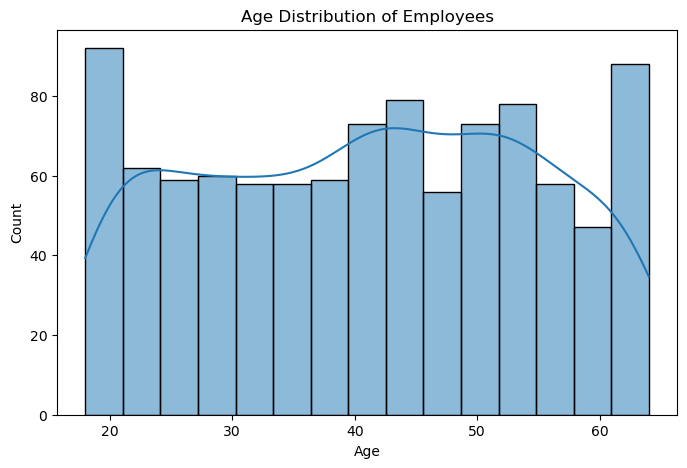

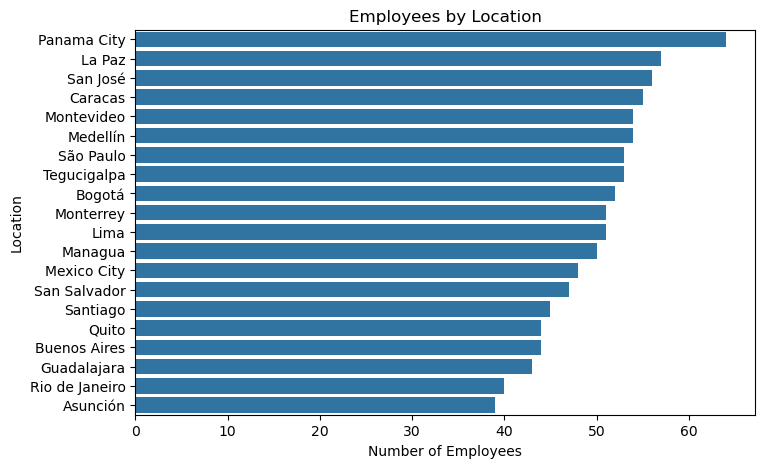

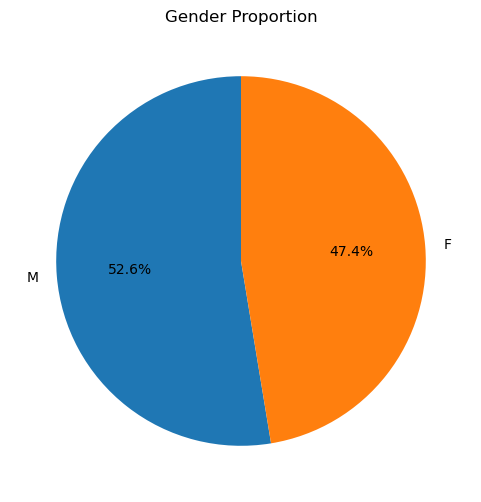

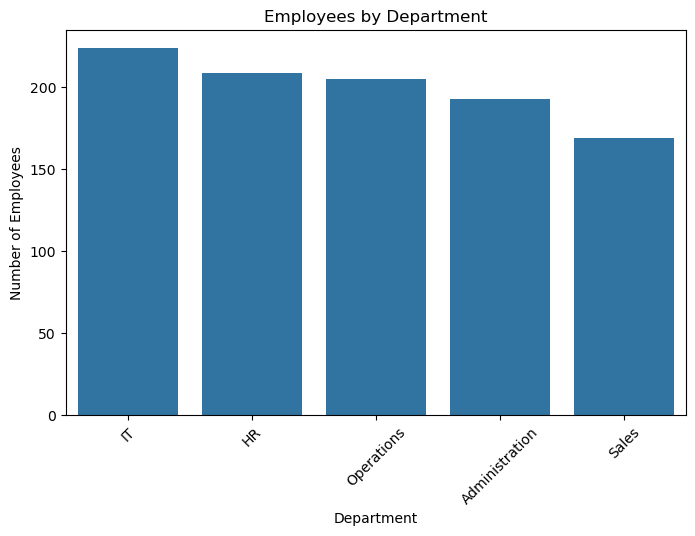

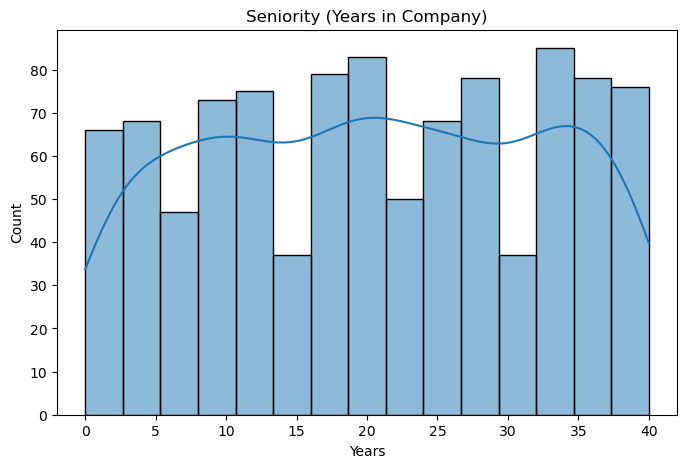

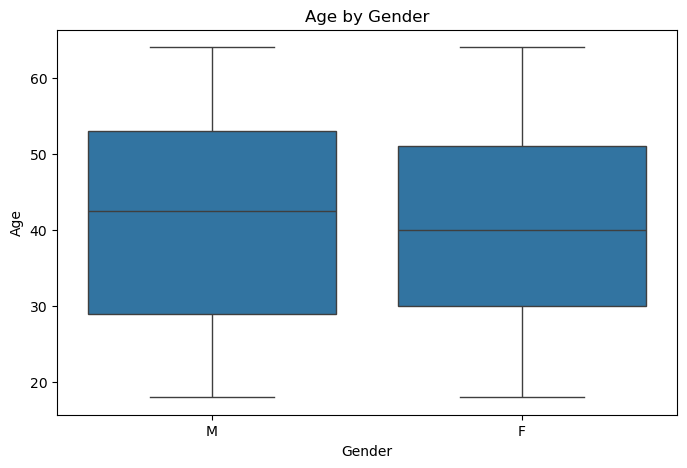

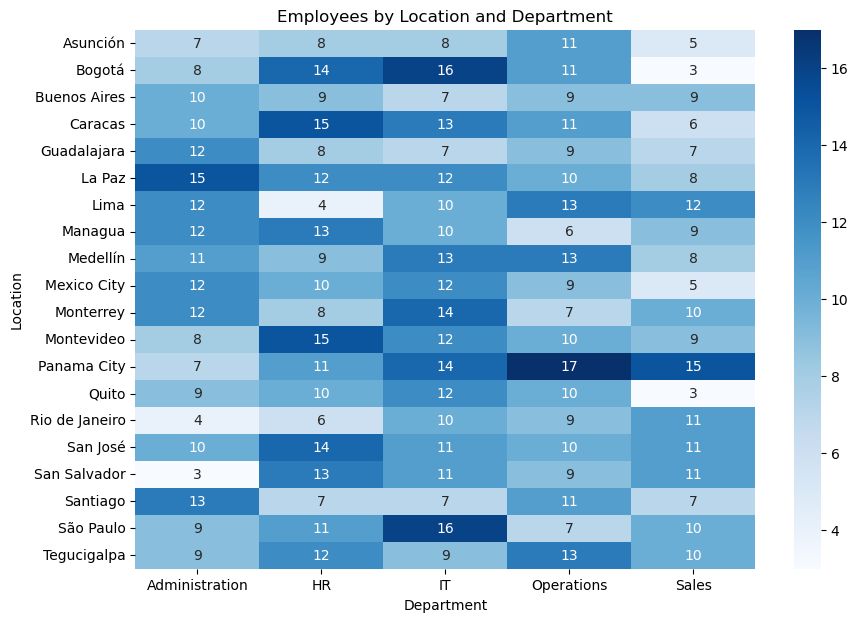

In [9]:
# 1. Employees – Demographics and Structure
import matplotlib.pyplot as plt
import seaborn as sns

# Age histogram
plt.figure(figsize=(8,5))
sns.histplot(employees['age'], bins=15, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Employee distribution by location
location_counts = employees['location'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(y=location_counts.index, x=location_counts.values, orient='h')
plt.title('Employees by Location')
plt.xlabel('Number of Employees')
plt.ylabel('Location')
plt.show()

# Gender proportion
plt.figure(figsize=(6,6))
gender_counts = employees['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Proportion')
plt.show()

# Employee count by department
plt.figure(figsize=(8,5))
dep_counts = employees['department'].value_counts()
sns.barplot(x=dep_counts.index, y=dep_counts.values)
plt.title('Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Seniority distribution
plt.figure(figsize=(8,5))
sns.histplot(employees['seniority_years'], bins=15, kde=True)
plt.title('Seniority (Years in Company)')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

# Boxplot of age by gender
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='age', data=employees)
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Heatmap of employees by location and department
pivot_emp = employees.pivot_table(index='location', columns='department', values='employee_id', aggfunc='count', fill_value=0)
plt.figure(figsize=(10,7))
sns.heatmap(pivot_emp, annot=True, fmt='d', cmap='Blues')
plt.title('Employees by Location and Department')
plt.xlabel('Department')
plt.ylabel('Location')
plt.show()

Columns after merge: Index(['evaluation_id', 'employee_id', 'date', 'BMI', 'cholesterol', 'smoker',
       'fit_for_work', 'age_group', 'gender_x', 'gender_y', 'gender'],
      dtype='object')


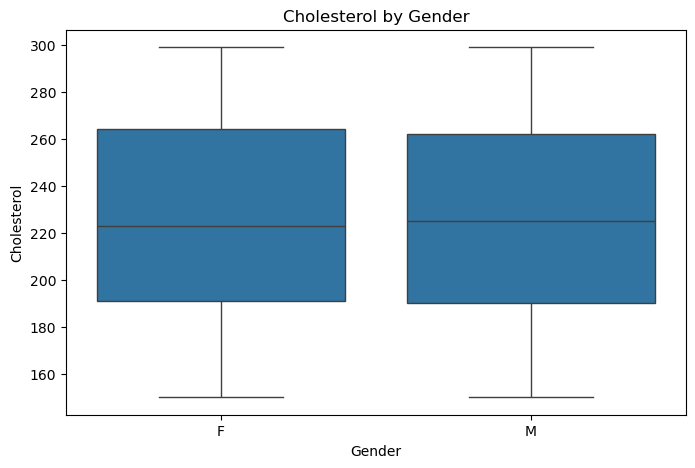

In [10]:
# Cholesterol comparison by gender
merged_gender = medical_evaluations.merge(employees[['employee_id','gender']], on='employee_id', how='left')
print('Columns after merge:', merged_gender.columns)
if 'gender' in merged_gender.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='gender', y='cholesterol', data=merged_gender)
    plt.title('Cholesterol by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Cholesterol')
    plt.show()
else:
    print('Column "gender" not found after merge. Please check the merge logic and column names.')

## Additional Exploratory Figures: Motivation and Plan

To deepen our understanding of the synthetic occupational health datasets, we will create additional visualizations beyond the standard EDA. These figures will help us uncover hidden patterns, compare groups, and explore relationships between variables such as age, seniority, BMI, absenteeism, and event costs. By visualizing these aspects, we can better inform future modeling and decision-making, and ensure our synthetic data reflects realistic scenarios.

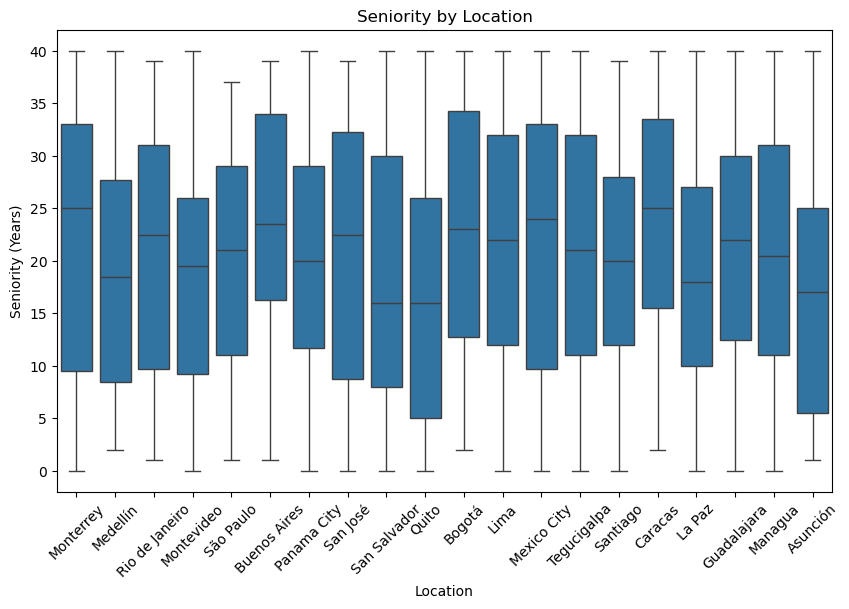

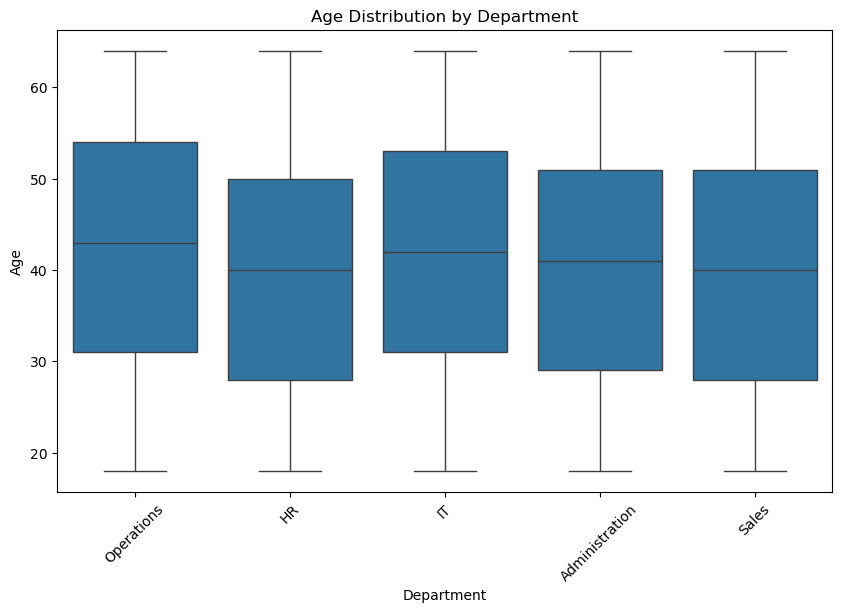

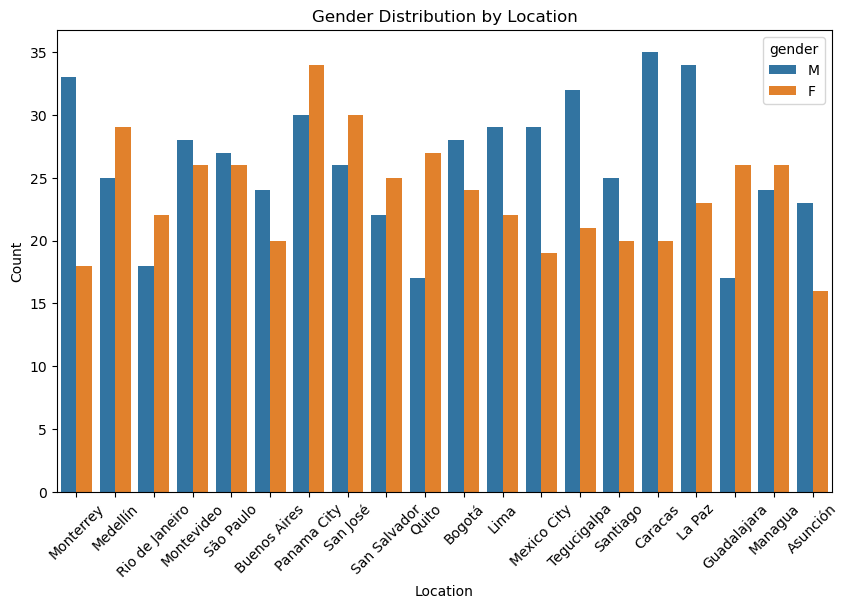

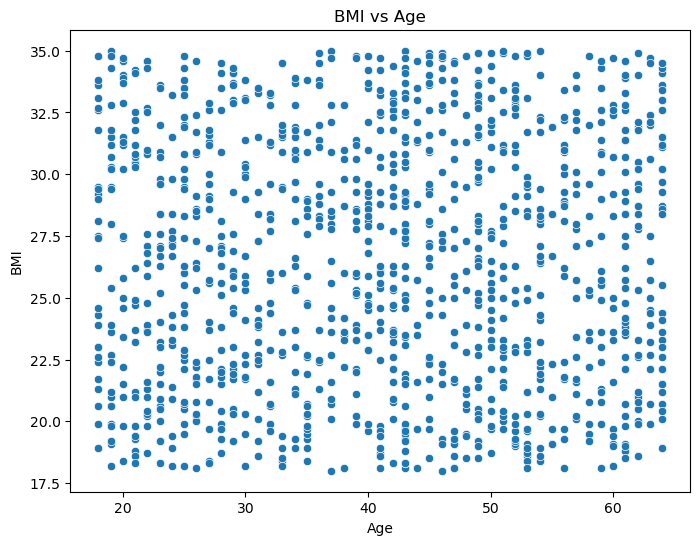

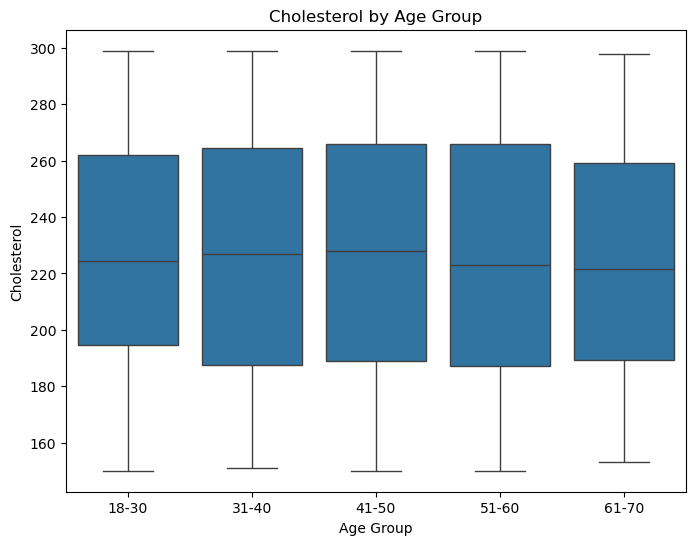

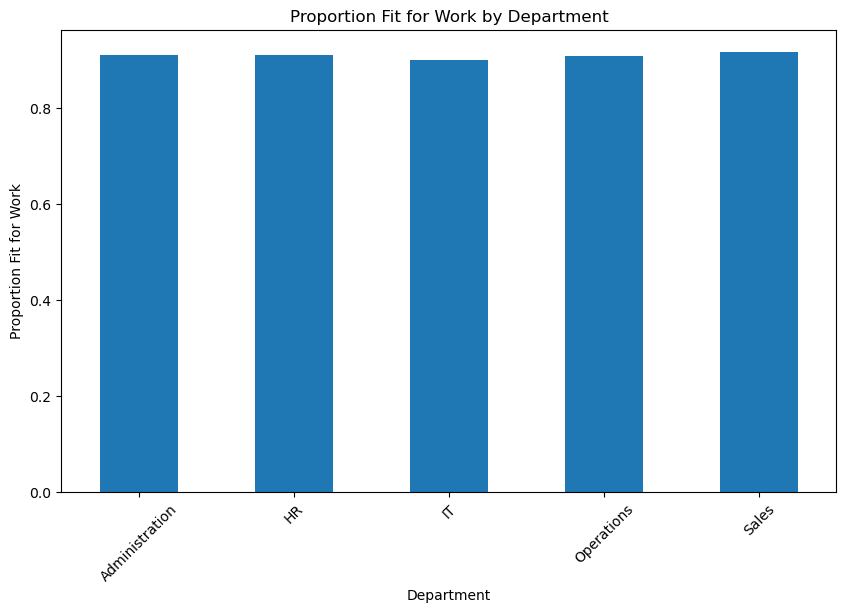

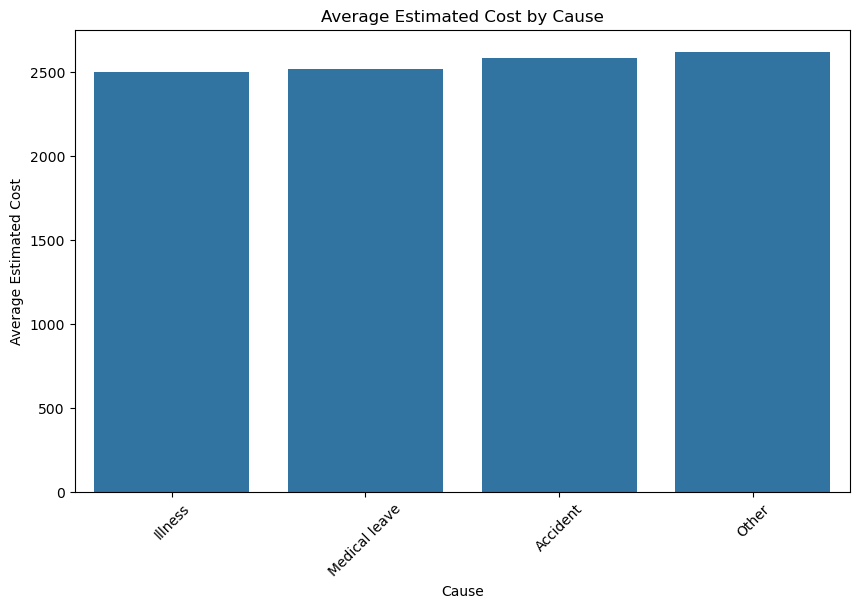

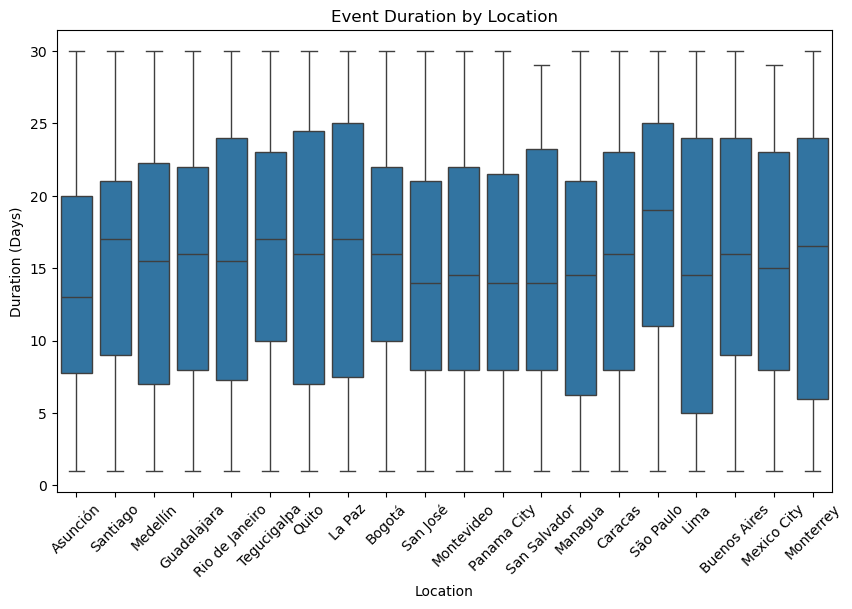

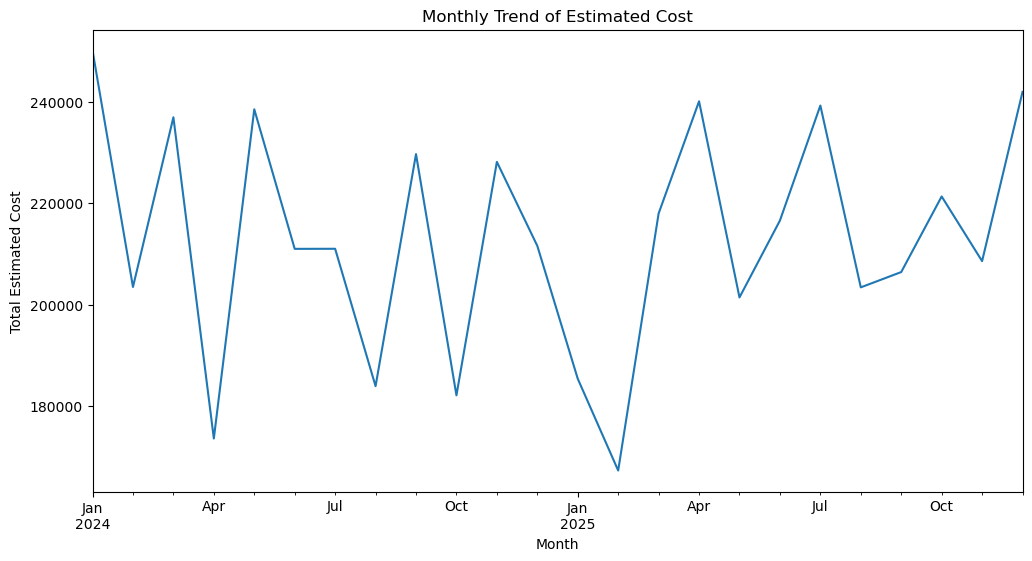

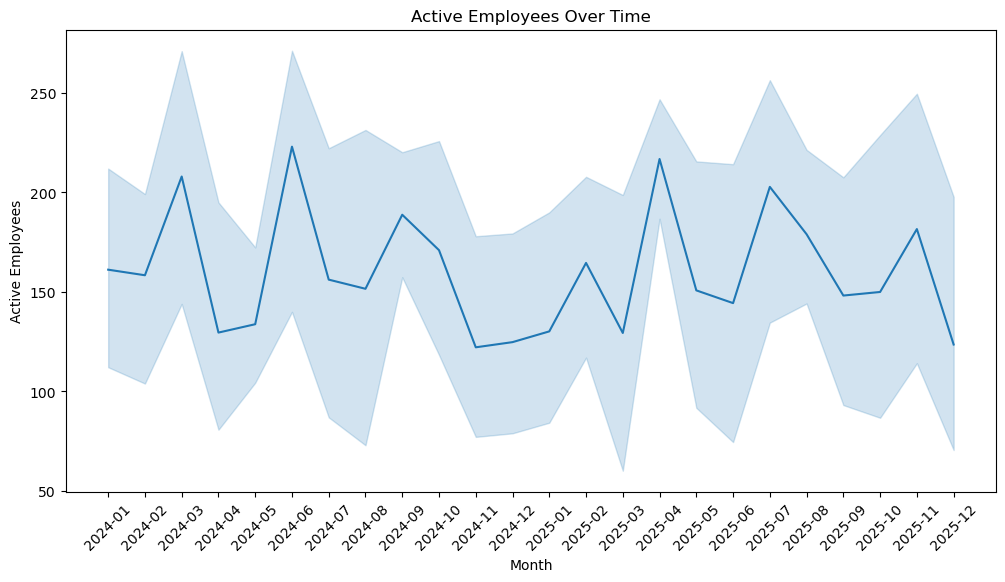

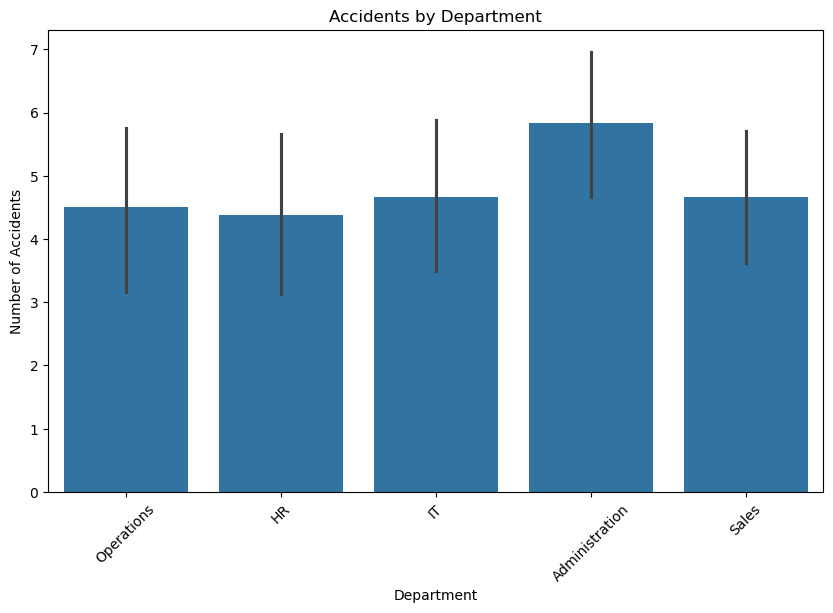

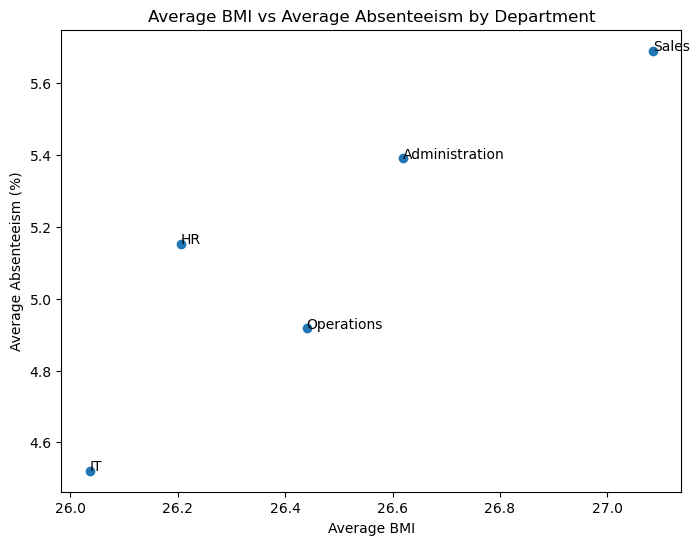

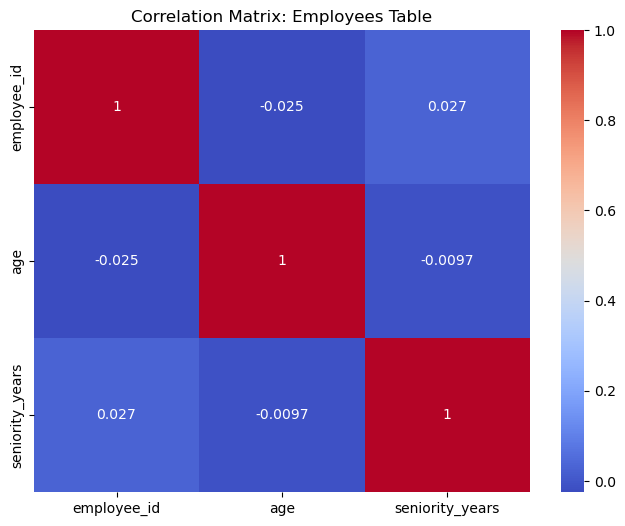

In [14]:
# Additional EDA Figures
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seniority by location
plt.figure(figsize=(10,6))
sns.boxplot(x='location', y='seniority_years', data=employees)
plt.title('Seniority by Location')
plt.xlabel('Location')
plt.ylabel('Seniority (Years)')
plt.xticks(rotation=45)
plt.show()

# 2. Age distribution by department
plt.figure(figsize=(10,6))
sns.boxplot(x='department', y='age', data=employees)
plt.title('Age Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# 3. Gender distribution by location
plt.figure(figsize=(10,6))
sns.countplot(x='location', hue='gender', data=employees)
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. BMI vs Age
merged_bmi_age = medical_evaluations.merge(employees[['employee_id','age']], on='employee_id', how='left')
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='BMI', data=merged_bmi_age)
plt.title('BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# 5. Cholesterol by age group
plt.figure(figsize=(8,6))
if 'age_group' in medical_evaluations.columns:
    sns.boxplot(x='age_group', y='cholesterol', data=medical_evaluations)
    plt.title('Cholesterol by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Cholesterol')
    plt.show()
else:
    print('Column "age_group" not found. Please create age groups before plotting.')

# 6. Proportion of fit for work by department
merged_fit = medical_evaluations.merge(employees[['employee_id','department']], on='employee_id', how='left')
fit_counts = merged_fit.groupby('department')['fit_for_work'].mean()
plt.figure(figsize=(10,6))
fit_counts.plot(kind='bar')
plt.title('Proportion Fit for Work by Department')
plt.xlabel('Department')
plt.ylabel('Proportion Fit for Work')
plt.xticks(rotation=45)
plt.show()

# 7. Average estimated cost by cause
plt.figure(figsize=(10,6))
cost_by_cause = health_events.groupby('cause')['estimated_cost'].mean().sort_values()
sns.barplot(x=cost_by_cause.index, y=cost_by_cause.values)
plt.title('Average Estimated Cost by Cause')
plt.xlabel('Cause')
plt.ylabel('Average Estimated Cost')
plt.xticks(rotation=45)
plt.show()

# 8. Event duration by location (merge health_events with employees to get location)
health_events_loc = health_events.merge(employees[['employee_id','location']], on='employee_id', how='left')
plt.figure(figsize=(10,6))
sns.boxplot(x='location', y='duration_days', data=health_events_loc)
plt.title('Event Duration by Location')
plt.xlabel('Location')
plt.ylabel('Duration (Days)')
plt.xticks(rotation=45)
plt.show()

# 9. Monthly trend of estimated cost
health_events['month'] = pd.to_datetime(health_events['date']).dt.to_period('M')
monthly_cost = health_events.groupby('month')['estimated_cost'].sum()
plt.figure(figsize=(12,6))
monthly_cost.plot()
plt.title('Monthly Trend of Estimated Cost')
plt.xlabel('Month')
plt.ylabel('Total Estimated Cost')
plt.show()

# 10. Active employees trend
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='active_employees', data=monthly_kpis)
plt.title('Active Employees Over Time')
plt.xlabel('Month')
plt.ylabel('Active Employees')
plt.xticks(rotation=45)
plt.show()

# 11. Accidents by department
plt.figure(figsize=(10,6))
sns.barplot(x='department', y='accidents', data=monthly_kpis)
plt.title('Accidents by Department')
plt.xlabel('Department')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 12. BMI vs absenteeism by department
merged_bmi_abs = medical_evaluations.merge(employees[['employee_id','department']], on='employee_id', how='left')
avg_bmi = merged_bmi_abs.groupby('department')['BMI'].mean()
avg_abs = monthly_kpis.groupby('department')['absenteeism_%'].mean()
plt.figure(figsize=(8,6))
plt.scatter(avg_bmi, avg_abs)
for i, dept in enumerate(avg_bmi.index):
    plt.text(avg_bmi.iloc[i], avg_abs.iloc[i], dept)  # Use .iloc for positional indexing to avoid FutureWarning
plt.title('Average BMI vs Average Absenteeism by Department')
plt.xlabel('Average BMI')
plt.ylabel('Average Absenteeism (%)')
plt.show()

# 13. Correlation matrix for employees
plt.figure(figsize=(8,6))
employees_corr = employees.select_dtypes(include='number').corr()
sns.heatmap(employees_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Employees Table')
plt.show()

## Next Steps: Predictive Analysis of Absenteeism Rate & Event Risk

Based on the insights gained from the previous figures and exploratory analysis, I have decided to further investigate whether certain variables can be used to predict key outcomes such as Absenteeism Rate and Event Risk. The next set of visualizations and analyses will focus on identifying potential predictors and understanding their relationships with these important occupational health metrics. This approach will help inform the selection of features for future predictive modeling and support data-driven decision-making in occupational health management.

## 🎯 Target Variables for Predictive Analysis

We will now explore figures specifically designed to analyze and visualize the two main predictive targets:
- **Absenteeism Rate** (by department, location, or employee – regression)
- **Event Risk** (probability of having an event, event duration, or cost – classification or regression)

The following code cells are organized by target variable and will help us identify patterns, group differences, and relationships that inform predictive modeling.

### 1. Absenteeism Rate – Predictive Exploration

The following figures explore patterns and relationships for Absenteeism Rate, aiming to identify predictive features and group differences.

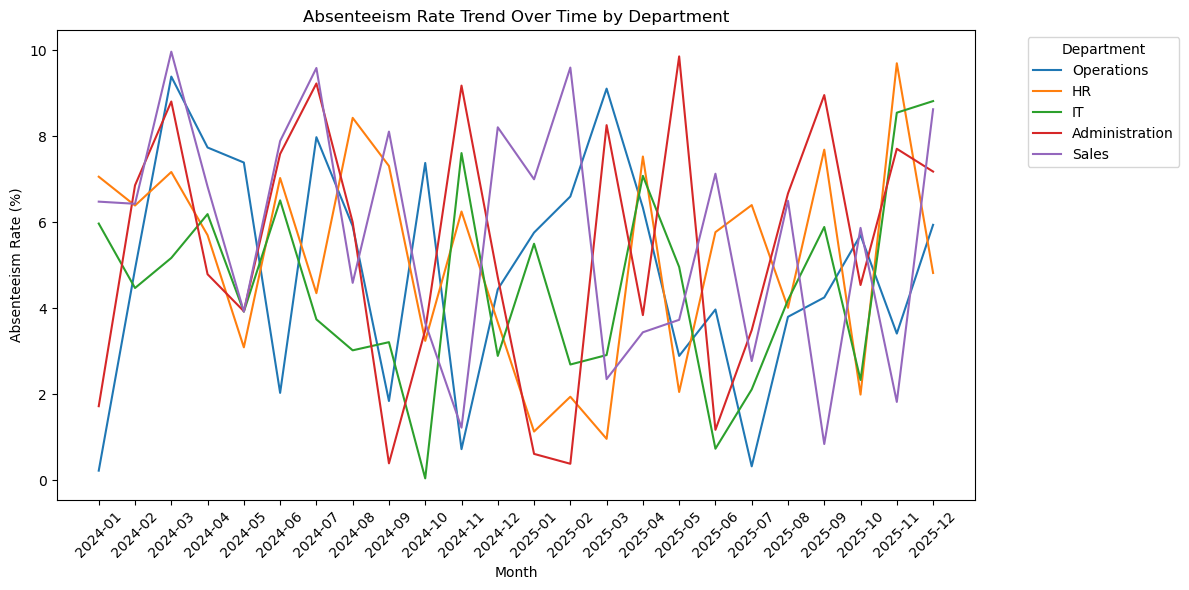

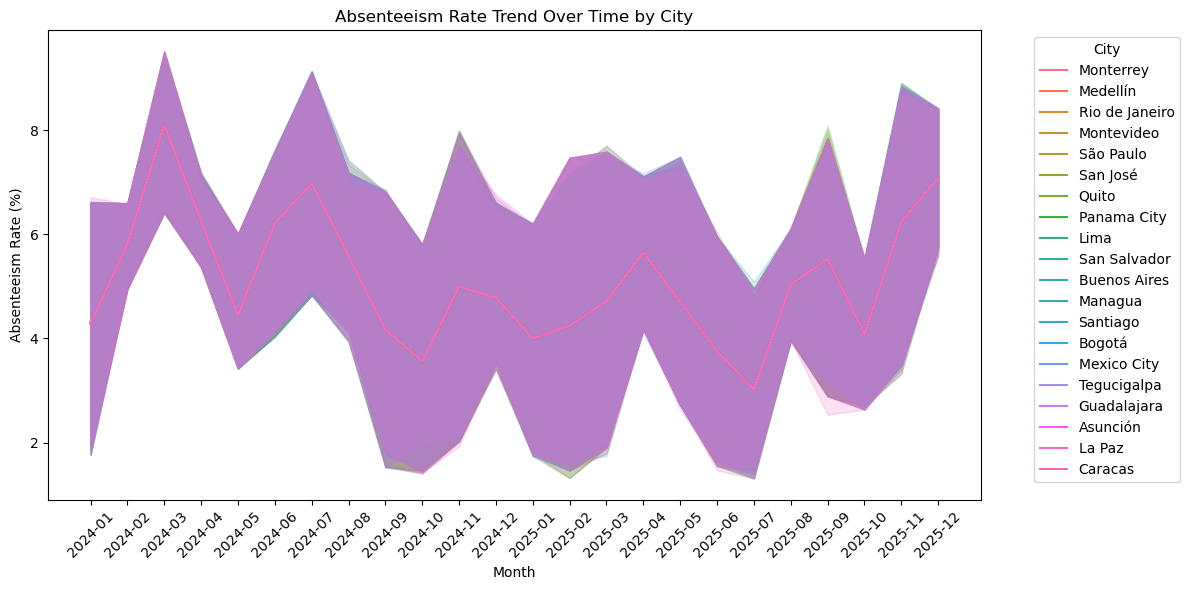

In [16]:
# a) Absenteeism Rate Trend Over Time by Department and City
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='absenteeism_%', hue='department', data=monthly_kpis)
plt.title('Absenteeism Rate Trend Over Time by Department')
plt.xlabel('Month')
plt.ylabel('Absenteeism Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Fix: Merge monthly_kpis with employees to get location for each department
dept_location = employees[['department','location']].drop_duplicates()
monthly_kpis_loc = monthly_kpis.merge(dept_location, on='department', how='left')
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='absenteeism_%', hue='location', data=monthly_kpis_loc)
plt.title('Absenteeism Rate Trend Over Time by City')
plt.xlabel('Month')
plt.ylabel('Absenteeism Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

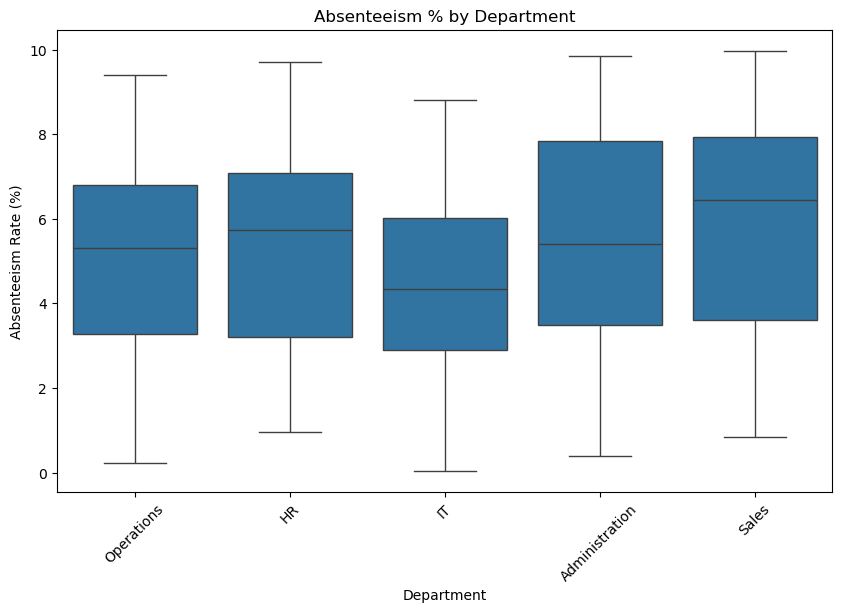

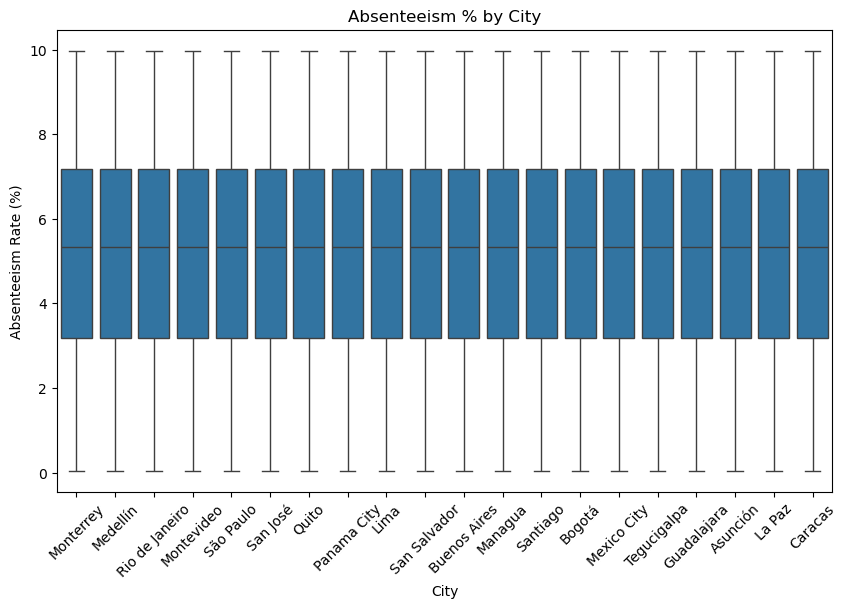

In [18]:
# b) Boxplots of Absenteeism % by Group
plt.figure(figsize=(10,6))
sns.boxplot(x='department', y='absenteeism_%', data=monthly_kpis)
plt.title('Absenteeism % by Department')
plt.xlabel('Department')
plt.ylabel('Absenteeism Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Fix: Merge monthly_kpis with employees to get location for each department
dept_location = employees[['department','location']].drop_duplicates()
monthly_kpis_loc = monthly_kpis.merge(dept_location, on='department', how='left')
plt.figure(figsize=(10,6))
sns.boxplot(x='location', y='absenteeism_%', data=monthly_kpis_loc)
plt.title('Absenteeism % by City')
plt.xlabel('City')
plt.ylabel('Absenteeism Rate (%)')
plt.xticks(rotation=45)
plt.show()

# If age group and gender are available in monthly_kpis, plot them as well
if 'age_group' in monthly_kpis.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='age_group', y='absenteeism_%', data=monthly_kpis)
    plt.title('Absenteeism % by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Absenteeism Rate (%)')
    plt.show()
if 'gender' in monthly_kpis.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='absenteeism_%', data=monthly_kpis)
    plt.title('Absenteeism % by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Absenteeism Rate (%)')
    plt.show()

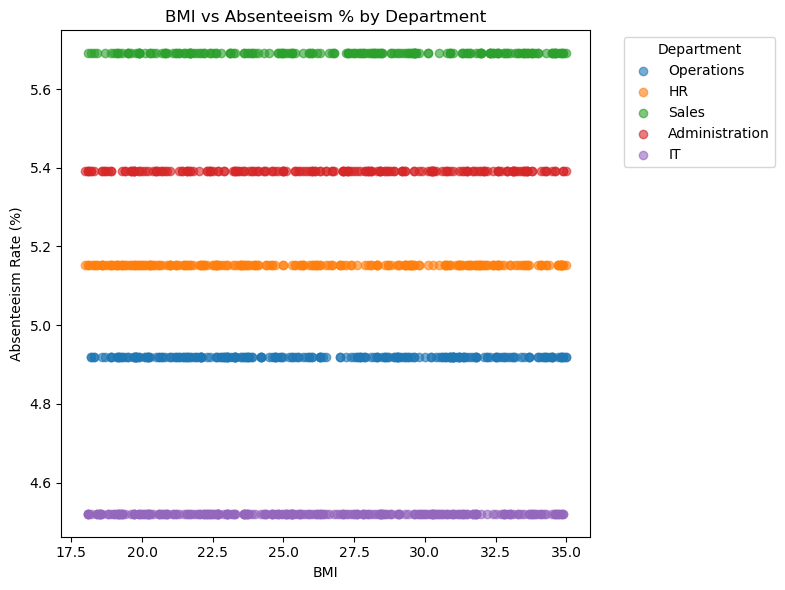

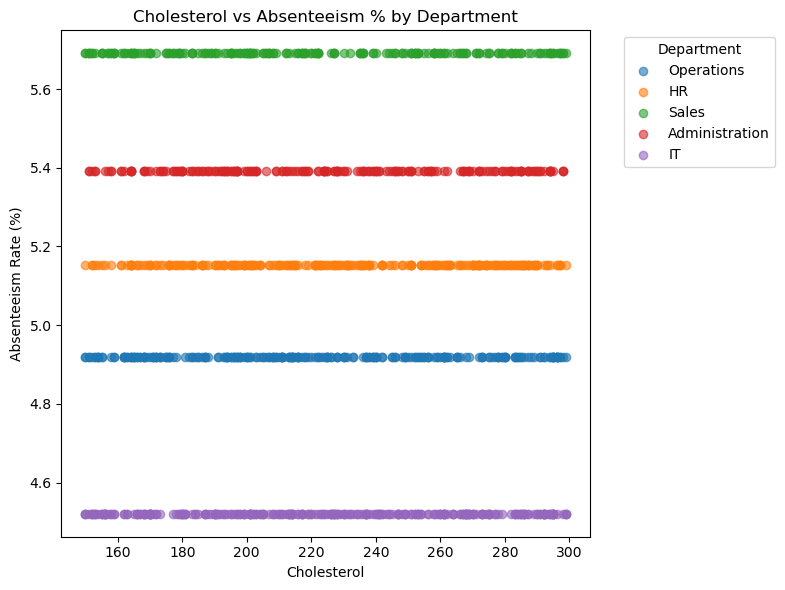

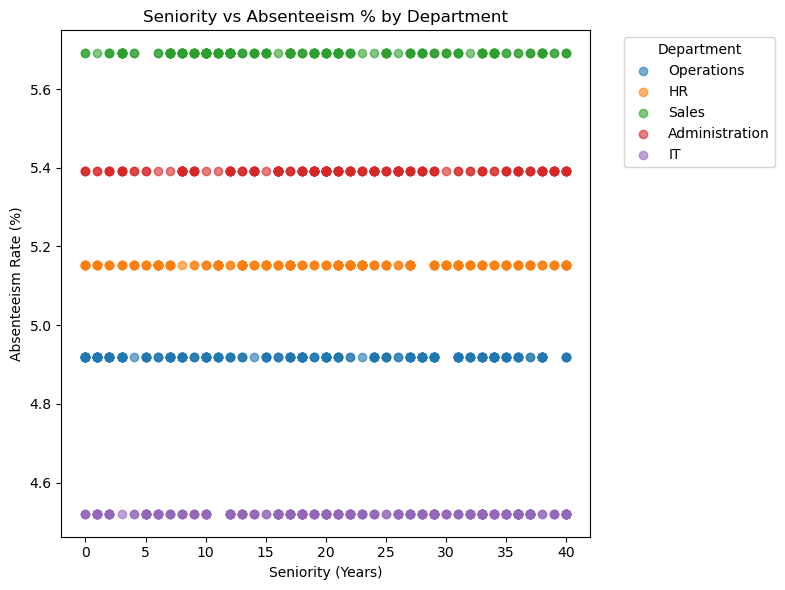

In [21]:
# c) Scatterplots: Features vs Absenteeism %
merged_bmi_abs = medical_evaluations.merge(employees[['employee_id','department','location','seniority_years']], on='employee_id', how='left')
avg_abs_dept = monthly_kpis.groupby('department')['absenteeism_%'].mean()
# Remove avg_abs_loc as monthly_kpis does not have location

# BMI vs absenteeism % (by department)
plt.figure(figsize=(8,6))
for dept in merged_bmi_abs['department'].unique():
    dept_bmi = merged_bmi_abs[merged_bmi_abs['department'] == dept]['BMI']
    plt.scatter(dept_bmi, [avg_abs_dept[dept]]*len(dept_bmi), label=dept, alpha=0.6)
plt.title('BMI vs Absenteeism % by Department')
plt.xlabel('BMI')
plt.ylabel('Absenteeism Rate (%)')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cholesterol vs absenteeism % (by department)
plt.figure(figsize=(8,6))
for dept in merged_bmi_abs['department'].unique():
    dept_chol = merged_bmi_abs[merged_bmi_abs['department'] == dept]['cholesterol']
    plt.scatter(dept_chol, [avg_abs_dept[dept]]*len(dept_chol), label=dept, alpha=0.6)
plt.title('Cholesterol vs Absenteeism % by Department')
plt.xlabel('Cholesterol')
plt.ylabel('Absenteeism Rate (%)')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Seniority vs absenteeism % (by department)
plt.figure(figsize=(8,6))
for dept in merged_bmi_abs['department'].unique():
    dept_sen = merged_bmi_abs[merged_bmi_abs['department'] == dept]['seniority_years']
    plt.scatter(dept_sen, [avg_abs_dept[dept]]*len(dept_sen), label=dept, alpha=0.6)
plt.title('Seniority vs Absenteeism % by Department')
plt.xlabel('Seniority (Years)')
plt.ylabel('Absenteeism Rate (%)')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

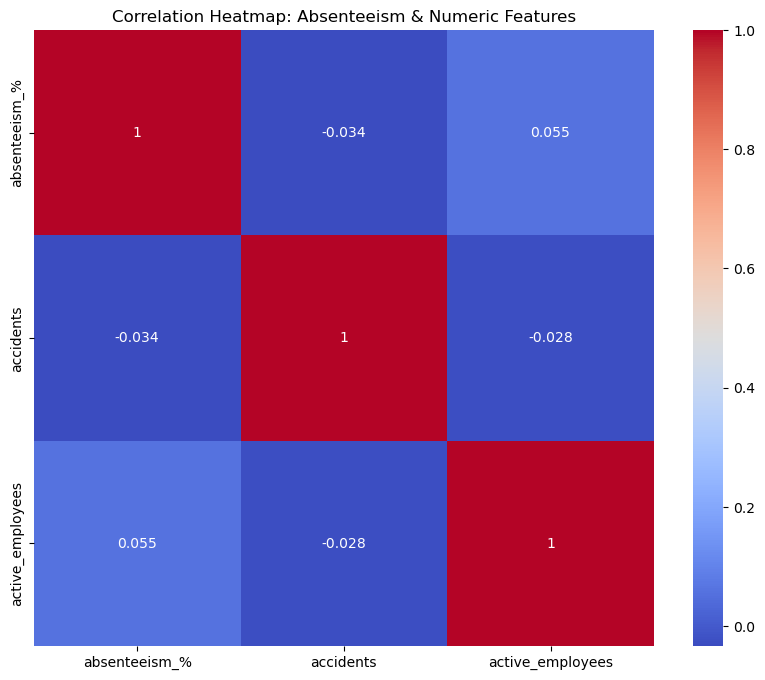

In [23]:
# d) Heatmap of Correlations (Absenteeism & Numeric Features)
# Use only numeric columns from monthly_kpis for correlation
numeric_cols = monthly_kpis.select_dtypes(include='number')
corr = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Absenteeism & Numeric Features')
plt.show()

## Summary: Absenteeism Rate Predictive Analysis

**Key Findings:**
- The absenteeism rate shows high variability over time, departments, and cities, with no clear pattern or consistently high/low group.
- Boxplots and scatterplots indicate that absenteeism rate is not explained by department, city, BMI, cholesterol, seniority, accidents, or active employees.
- Correlation analysis confirms very weak or no linear relationship between absenteeism rate and these variables.

**Implications for Machine Learning Modeling:**
- The current variables do not provide strong predictive power for absenteeism rate.
- To build a useful ML model, consider:
    - Including additional features (e.g., job role, work environment, individual health history, external factors).
    - Using feature engineering to create new variables or interactions.
    - Applying more complex models (e.g., tree-based, ensemble, or time-series models) that can capture non-linear relationships.
    - Collecting more granular or longitudinal data if possible.

**Summary:**
Absenteeism rate cannot be reliably predicted using the current variables. Further data collection and advanced modeling approaches are recommended to improve predictive accuracy.

**Note:** These results may be due to the use of synthetic data rather than real-world data. If real data were available, stronger associations and predictive relationships might be found.

### 2. Event Risk – Predictive Exploration

The following figures explore patterns and relationships for Event Risk, focusing on the probability, duration, and cost of health events.

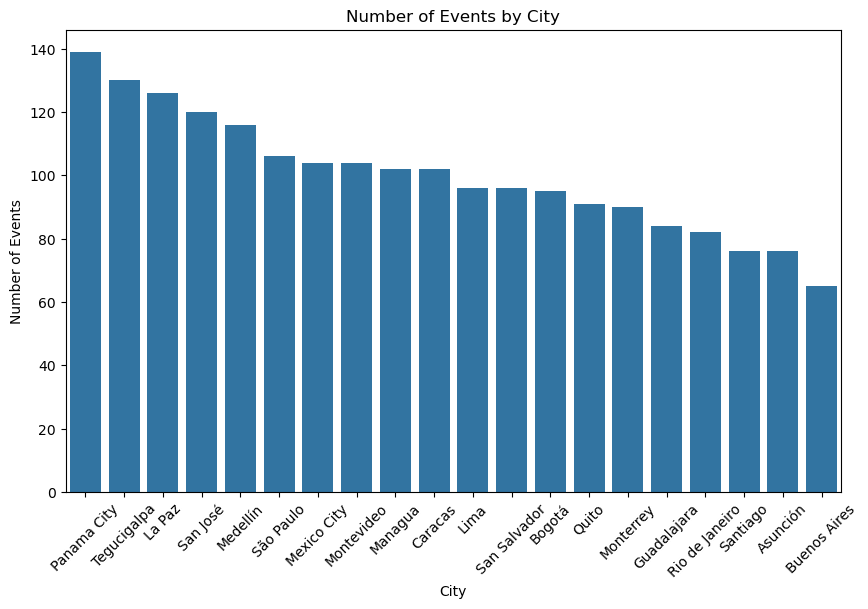

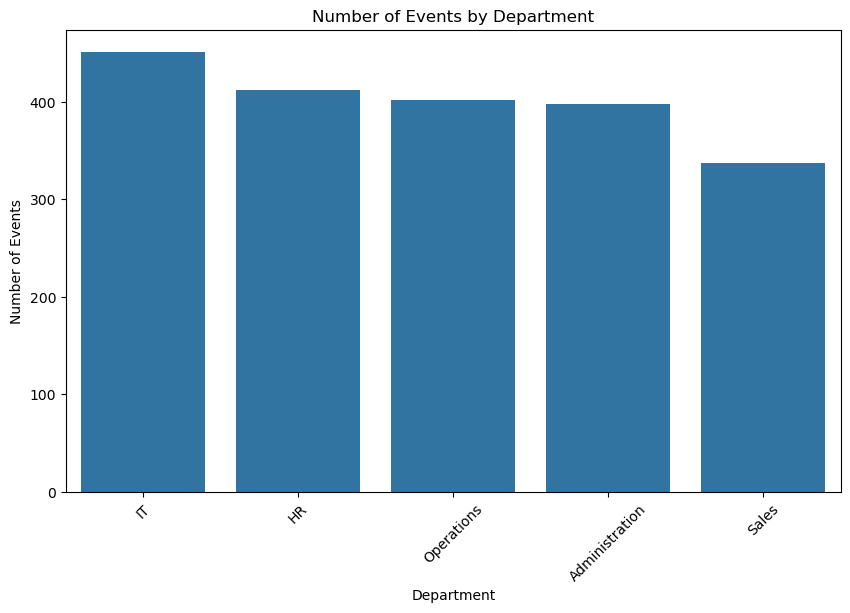

In [24]:
# a) Histogram / Barplot of Events by City and Department
events_by_city = health_events.merge(employees[['employee_id','location','department']], on='employee_id', how='left')
plt.figure(figsize=(10,6))
sns.countplot(x='location', data=events_by_city, order=events_by_city['location'].value_counts().index)
plt.title('Number of Events by City')
plt.xlabel('City')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='department', data=events_by_city, order=events_by_city['department'].value_counts().index)
plt.title('Number of Events by Department')
plt.xlabel('Department')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

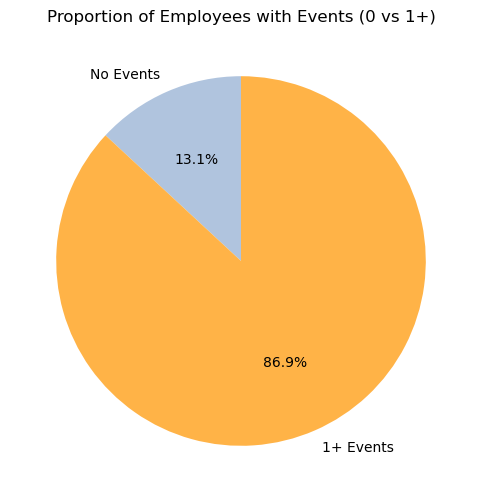

In [25]:
# b) Proportion of Employees with Events (0 vs 1+)
events_per_employee = health_events['employee_id'].value_counts()
has_event = employees['employee_id'].isin(events_per_employee.index)
labels = ['No Events', '1+ Events']
sizes = [len(employees) - has_event.sum(), has_event.sum()]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#b0c4de','#ffb347'])
plt.title('Proportion of Employees with Events (0 vs 1+)')
plt.show()

In [ ]:
# c) Boxplots: Health Indicators in Employees With vs Without Events

# Remove 'fit_for_work' from employees merge, as it is not in employees, but in medical_evaluations

employees['has_event'] = employees['employee_id'].isin(events_per_employee.index)

# Only merge 'employee_id' and 'has_event' from employees

merged_health = medical_evaluations.merge(employees[['employee_id','has_event']], on='employee_id', how='left')

plt.figure(figsize=(8,6))

sns.boxplot(x='has_event', y='cholesterol', data=merged_health)

plt.title('Cholesterol by Event Occurrence')

plt.xlabel('Has Event')

plt.ylabel('Cholesterol')

plt.xticks([0,1], ['No Event','1+ Events'])

plt.show()



plt.figure(figsize=(8,6))

sns.boxplot(x='has_event', y='BMI', data=merged_health)

plt.title('BMI by Event Occurrence')

plt.xlabel('Has Event')

plt.ylabel('BMI')

plt.xticks([0,1], ['No Event','1+ Events'])

plt.show()



# For fit_for_work, plot directly from medical_evaluations, merging only has_event

plt.figure(figsize=(8,6))

sns.boxplot(x='has_event', y='fit_for_work', data=merged_health)

plt.title('Fit for Work by Event Occurrence')

plt.xlabel('Has Event')

plt.ylabel('Fit for Work')

plt.xticks([0,1], ['No Event','1+ Events'])

plt.show()

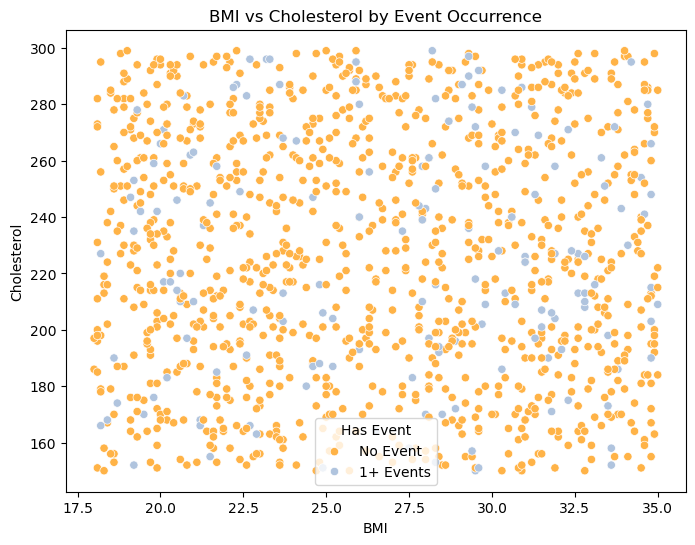

In [28]:
# d) Scatterplot: BMI vs Cholesterol (Color by Event Occurrence)
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='cholesterol', hue='has_event', data=merged_health, palette={False:'#b0c4de', True:'#ffb347'})
plt.title('BMI vs Cholesterol by Event Occurrence')
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.legend(title='Has Event', labels=['No Event','1+ Events'])
plt.show()

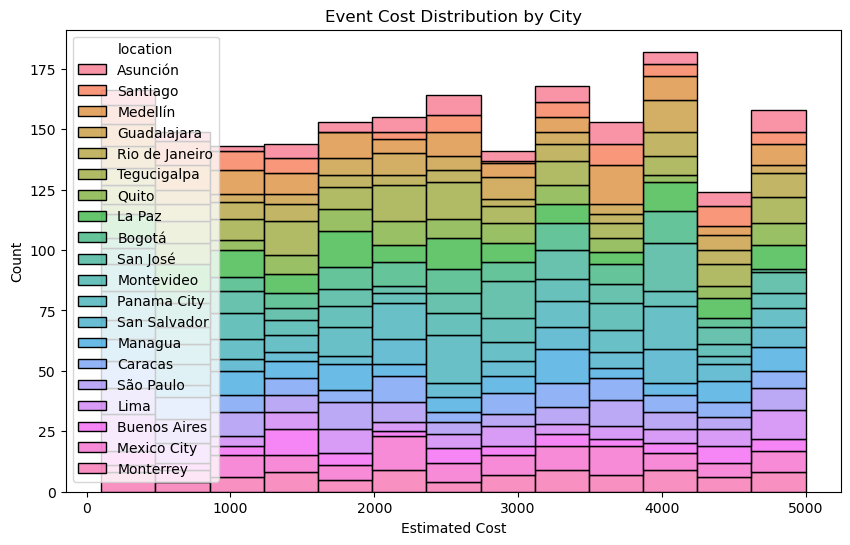

In [29]:
# e) Histogram of Event Cost by City, Age, Smoker, Fit for Work
plt.figure(figsize=(10,6))
sns.histplot(data=events_by_city, x='estimated_cost', hue='location', multiple='stack')
plt.title('Event Cost Distribution by City')
plt.xlabel('Estimated Cost')
plt.ylabel('Count')
plt.show()

# If age or smoker/fit columns are available, plot those as well
if 'age' in events_by_city.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=events_by_city, x='estimated_cost', hue='age', multiple='stack')
    plt.title('Event Cost Distribution by Age')
    plt.xlabel('Estimated Cost')
    plt.ylabel('Count')
    plt.show()
if 'smoker' in events_by_city.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=events_by_city, x='estimated_cost', hue='smoker', multiple='stack')
    plt.title('Event Cost Distribution by Smoker Status')
    plt.xlabel('Estimated Cost')
    plt.ylabel('Count')
    plt.show()
if 'fit_for_work' in events_by_city.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=events_by_city, x='estimated_cost', hue='fit_for_work', multiple='stack')
    plt.title('Event Cost Distribution by Fit for Work')
    plt.xlabel('Estimated Cost')
    plt.ylabel('Count')
    plt.show()

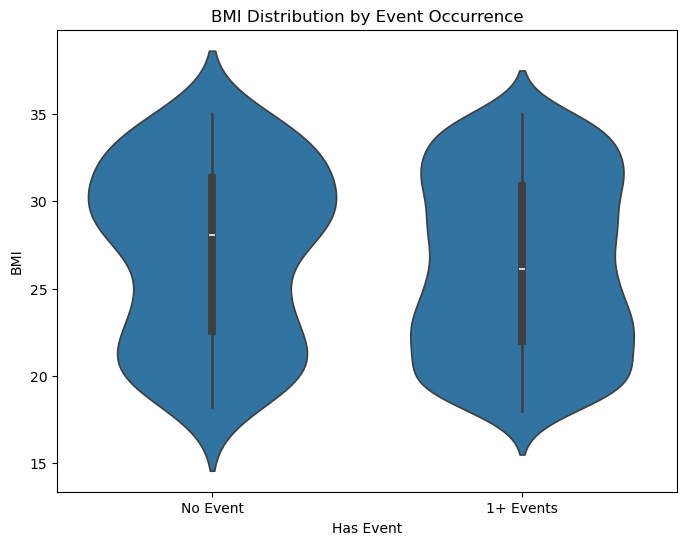

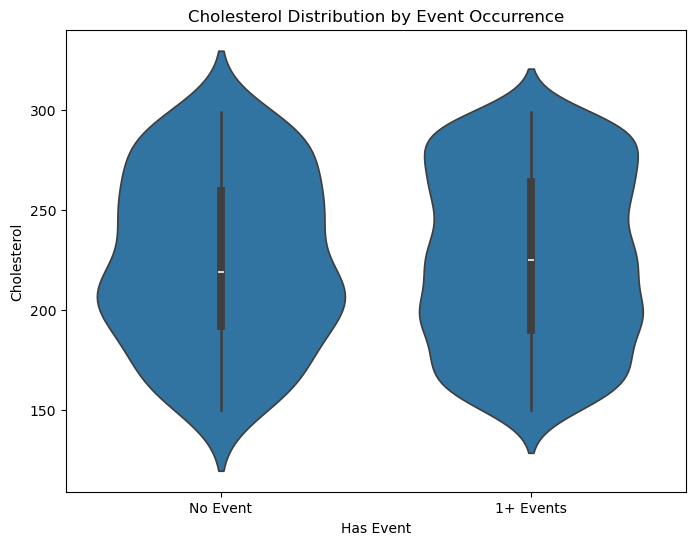

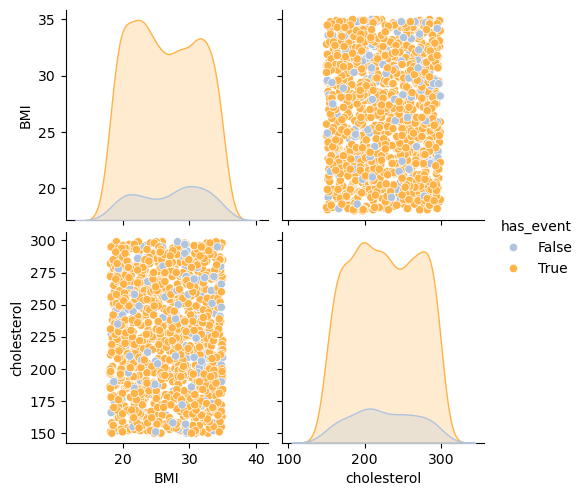

In [ ]:
# f) Violin/Boxplots & Pairplot: Feature Distributions by Event Occurrence
plt.figure(figsize=(8,6))
sns.violinplot(x='has_event', y='BMI', data=merged_health)
plt.title('BMI Distribution by Event Occurrence')
plt.xlabel('Has Event')
plt.ylabel('BMI')
plt.xticks([0,1], ['No Event','1+ Events'])
plt.show()

plt.figure(figsize=(8,6))
sns.violinplot(x='has_event', y='cholesterol', data=merged_health)
plt.title('Cholesterol Distribution by Event Occurrence')
plt.xlabel('Has Event')
plt.ylabel('Cholesterol')
plt.xticks([0,1], ['No Event','1+ Events'])
plt.show()

# Pairplot: Health indicators colored by event occurrence
import seaborn as sns
sns.pairplot(merged_health, vars=['BMI','cholesterol'], hue='has_event', palette={False:'#b0c4de', True:'#ffb347'})

## Summary: Health Risk Prediction and Variable Analysis

**Key Findings:**
- The analysis of event risk (health risk) across cities, departments, and health indicators (BMI, cholesterol) shows no strong or clear predictors for event occurrence in this dataset.
- Most employees experience at least one event, and the distribution of events is relatively uniform across locations and departments.
- Health variables such as BMI and cholesterol do not show significant differences between employees with and without events, as seen in violin plots and pairplots.
- Event cost is also distributed similarly across cities, with no unique high- or low-risk group.

**Implications for Machine Learning Modeling:**
- The current variables (demographics, department, city, BMI, cholesterol) do not provide strong predictive power for health risk or event occurrence.
- To improve predictive modeling, consider:
    - Collecting or engineering additional features (e.g., job role, work environment, stress levels, prior health history, behavioral data).
    - Exploring interaction effects or non-linear relationships using advanced models (e.g., tree-based, ensemble, or neural networks).
    - Using longitudinal or more granular data to capture temporal patterns and individual risk factors.
    - Applying feature selection and importance analysis to identify subtle predictors.

**Important Note:**
- These results are based on synthetic data, which may not fully capture the complexity and correlations present in real-world occupational health datasets. With real data, it is possible that stronger and more meaningful correlations could be found, leading to better predictive models.

**Next Steps:**
- Expand the dataset with more relevant features and real-world data if available.
- Apply machine learning models (classification or regression) and evaluate their performance.
- Use model explainability tools (e.g., SHAP, feature importance) to interpret results and guide further data collection or intervention strategies.

## Final Summary: EDA Insights and Next Steps

This notebook followed best practices for exploratory data analysis (EDA) in Python, including:
- Clear code structure and documentation for reproducibility and sharing.
- Systematic loading, inspection, and cleaning of synthetic occupational health datasets.
- Comprehensive visualizations to explore distributions, group differences, and relationships between variables.
- Careful analysis of missing and zero values to ensure data quality.
- Predictive exploration of absenteeism and health risk, with honest assessment of the limitations of the current variables.

**Key Takeaways:**
- The synthetic datasets are well-structured and mostly free of missing or problematic values.
- No strong predictors for absenteeism or health risk were found among the available variables (demographics, health indicators, department, city).
- The results highlight the importance of feature engineering, additional data collection, and advanced modeling to uncover hidden relationships.

**Next Phase: 03_ml_models**
- In the next notebook, we will build and evaluate various machine learning models for absenteeism and health risk.
- The goal is to discover hidden patterns and relationships, and to construct predictive tools that can support occupational health management.
- We will apply best practices in model selection, validation, and interpretation, and continue to document each step for transparency and reproducibility.

*This EDA provides a solid foundation for the modeling phase, ensuring that our approach is data-driven and methodologically sound.*